# Document Tree

each document gets represented as a tree with each heading as a node,
root node is the whole document with its title


In [ ]:
class HeadingNode:
    def __init__(self, title, start=None, end=None):
        self.title = title
        self.level = 0
        self.children = []
        self.parent = None
        self.start = start
        self.end = end
        self.summary = None

    def add_child(self, child_node):
        child_node.parent = self
        child_node.level = self.level + 1
        self.children.append(child_node)
        return child_node

    def find_node(self, title):
        if self.title == title:
            return self

        for child in self.children:
            result = child.find_node(title)
            if result:
                return result
        return None

    def print_tree(self, indent=""):
        position_info = f"[{self.start}:{self.end}]" if self.start is not None else ""
        print(f"{indent}{'#' * (self.level + 1)} {self.title} {position_info}")
        for child in self.children:
            child.print_tree(indent + "  ")

    def get_headings_page(self):
        pages = {}

        def collect_pages(node, heading_path):

            current_heading = {'title': node.title, 'level': node.level}
            current_path = heading_path + [current_heading]

            if node.start is not None and node.end is not None:
                for page in range(node.start, node.end + 1):
                    if page not in pages:
                        pages[page] = {'page': page, 'headings': []}

                    for heading in current_path:
                        if heading not in pages[page]['headings']:
                            pages[page]['headings'].append(heading)

            for child in node.children:
                collect_pages(child, current_path)

        collect_pages(self, [])

        result = [pages[page] for page in sorted(pages.keys())]
        return result

    def get_all_nodes(self):
        nodes = [self]
        for child in self.children:
            nodes.extend(child.get_all_nodes())

        return nodes


# Populating the Tree

**asked claude:**
*# Create a test document structure root = HeadingNode("Document Root", start=1, end=6)  # Add main sections introduction = root.add_child(HeadingNode("Introduction", start=1, end=2)) methodology = root.add_child(HeadingNode("Methodology", start=3, end=6))  # Add subsections intro_prob = introduction.add_child(HeadingNode("Problem Statement", start=1, end=2)) intro_obj = introduction.add_child(HeadingNode("Research Objectives", start=2, end=2))  method_design = methodology.add_child(HeadingNode("Research Design", start=3, end=4)) method_data = methodology.add_child(HeadingNode("Data Collection", start=4, end=6)) method_data.add_child(HeadingNode("Sampling Method", start=4, end=5)) method_data.add_child(HeadingNode("Instruments", start=5, end=6)) write code like this for the attached document*

In [ ]:
# Create document structure tree
root = HeadingNode("MiR 24V Battery Troubleshooting and Technical Guide", start=1, end=69)

# Add main sections
about = root.add_child(HeadingNode("1. About this document", start=4, end=9))
product = root.add_child(HeadingNode("2. Product description", start=10, end=14))
states = root.add_child(HeadingNode("3. States", start=15, end=20))
storage = root.add_child(HeadingNode("4. Storage", start=21, end=24))
chargers = root.add_child(HeadingNode("5. Cable chargers and adapter cables", start=25, end=38))
troubleshooting = root.add_child(HeadingNode("6. Troubleshooting", start=39, end=67))
specs = root.add_child(HeadingNode("7. Battery specifications", start=68, end=69))

# Add subsections for About this document
about.add_child(HeadingNode("1.1 Version history", start=5, end=7))
about.add_child(HeadingNode("1.2 Where to find more information", start=7, end=9))

# Add subsections for Product description
product.add_child(HeadingNode("2.1 Battery versions", start=10, end=11))
product.add_child(HeadingNode("2.2 Connection socket", start=11, end=12))
product.add_child(HeadingNode("2.3 LED indicators", start=12, end=14))

# Add subsections for States
states.add_child(HeadingNode("3.1 Active", start=15, end=17))
states.add_child(HeadingNode("3.2 Idle", start=17, end=18))
states.add_child(HeadingNode("3.3 Deep sleep", start=18, end=20))

# Add subsections for Storage
storage.add_child(HeadingNode("4.1 Deep sleep storage (outside the robot)", start=22, end=24))
storage.add_child(HeadingNode("4.2 Active storage (inside an inactive robot)", start=24, end=24))

# Add subsections for Cable chargers and adapter cables
chargers.add_child(HeadingNode("5.1 Charging with cable chargers", start=26, end=36))
chargers.add_child(HeadingNode("5.2 Adapter cables", start=36, end=38))

# Add subsections for Troubleshooting
troubleshooting.add_child(HeadingNode("6.1 Battery does not power the robot", start=39, end=62))
troubleshooting.add_child(HeadingNode("6.2 Battery does not charge to 100%", start=62, end=62))
troubleshooting.add_child(HeadingNode("6.3 Robot turns off randomly", start=62, end=63))
troubleshooting.add_child(HeadingNode("6.4 Host-cycling the battery", start=63, end=64))
troubleshooting.add_child(HeadingNode("6.5 Battery-related error codes", start=64, end=67))
root.print_tree()

# MiR 24V Battery Troubleshooting and Technical Guide [1:69]
  ## 1. About this document [4:9]
    ### 1.1 Version history [5:7]
    ### 1.2 Where to find more information [7:9]
  ## 2. Product description [10:14]
    ### 2.1 Battery versions [10:11]
    ### 2.2 Connection socket [11:12]
    ### 2.3 LED indicators [12:14]
  ## 3. States [15:20]
    ### 3.1 Active [15:17]
    ### 3.2 Idle [17:18]
    ### 3.3 Deep sleep [18:20]
  ## 4. Storage [21:24]
    ### 4.1 Deep sleep storage (outside the robot) [22:24]
    ### 4.2 Active storage (inside an inactive robot) [24:24]
  ## 5. Cable chargers and adapter cables [25:38]
    ### 5.1 Charging with cable chargers [26:36]
    ### 5.2 Adapter cables [36:38]
  ## 6. Troubleshooting [39:67]
    ### 6.1 Battery does not power the robot [39:62]
    ### 6.2 Battery does not charge to 100% [62:62]
    ### 6.3 Robot turns off randomly [62:63]
    ### 6.4 Host-cycling the battery [63:64]
    ### 6.5 Battery-related error codes [64:67]
  ## 7. Battery 

*make it more finegrained*

In [ ]:
# Create document structure tree
root = HeadingNode("MiR 24V Battery Troubleshooting and Technical Guide", start=1, end=69)

# Copyright and Table of Contents
copyright = root.add_child(HeadingNode("Copyright and disclaimer", start=2, end=3))
toc = root.add_child(HeadingNode("Table of contents", start=3, end=3))

# 1. About this document
about = root.add_child(HeadingNode("1. About this document", start=4, end=9))
version_history = about.add_child(HeadingNode("1.1 Version history", start=5, end=7))
more_info = about.add_child(HeadingNode("1.2 Where to find more information", start=7, end=9))
more_info.add_child(HeadingNode("Documentation", start=7, end=9))
more_info.add_child(HeadingNode("Models and drawings", start=9, end=9))
more_info.add_child(HeadingNode("Resources", start=9, end=9))

# 2. Product description
product = root.add_child(HeadingNode("2. Product description", start=10, end=14))
battery_versions = product.add_child(HeadingNode("2.1 Battery versions", start=10, end=11))
battery_versions.add_child(HeadingNode("Standard battery versions", start=10, end=11))
battery_versions.add_child(HeadingNode("Extended capacity battery versions", start=11, end=11))

connection = product.add_child(HeadingNode("2.2 Connection socket", start=11, end=12))
led = product.add_child(HeadingNode("2.3 LED indicators", start=12, end=14))
led.add_child(HeadingNode("State of charge indicator", start=13, end=14))

# 3. States
states = root.add_child(HeadingNode("3. States", start=15, end=20))
active = states.add_child(HeadingNode("3.1 Active", start=15, end=17))
idle = states.add_child(HeadingNode("3.2 Idle", start=17, end=18))
deep_sleep = states.add_child(HeadingNode("3.3 Deep sleep", start=18, end=20))

# 4. Storage
storage = root.add_child(HeadingNode("4. Storage", start=21, end=24))
deep_sleep_storage = storage.add_child(HeadingNode("4.1 Deep sleep storage (outside the robot)", start=22, end=24))
active_storage = storage.add_child(HeadingNode("4.2 Active storage (inside an inactive robot)", start=24, end=24))

# 5. Cable chargers and adapter cables
chargers = root.add_child(HeadingNode("5. Cable chargers and adapter cables", start=25, end=38))
charging = chargers.add_child(HeadingNode("5.1 Charging with cable chargers", start=26, end=36))

# Add detailed charging subsections
charging.add_child(HeadingNode("Charging with an external charger: Battery Charger 24V 13A", start=28, end=31))
charging.add_child(HeadingNode("Charging with an external charger: Power First", start=31, end=34))
charging.add_child(HeadingNode("Charging with an internal charger: S.P.E. and Blue Power", start=35, end=35))
charging.add_child(HeadingNode("Foreseeable misuse", start=35, end=35))
charging.add_child(HeadingNode("Verifying charging in the robot interface", start=36, end=36))

adapter_cables = chargers.add_child(HeadingNode("5.2 Adapter cables", start=36, end=38))
adapter_cables.add_child(HeadingNode("Battery adapter cable 450687 and 450681 for replacement batteries", start=37, end=37))
adapter_cables.add_child(HeadingNode("Host detect cable W318a for replacement batteries", start=38, end=38))

# 6. Troubleshooting
troubleshooting = root.add_child(HeadingNode("6. Troubleshooting", start=39, end=67))
no_power = troubleshooting.add_child(HeadingNode("6.1 Battery does not power the robot", start=39, end=62))

# Add detailed troubleshooting subsections
no_power.add_child(HeadingNode("Troubleshooting a battery from storage or delivery", start=40, end=42))
no_power.add_child(HeadingNode("Troubleshooting a retrofitted battery in MiR100 HW 1.0-1.9.1 or MiR200 HW 1.0-1.0.1", start=43, end=47))
no_power.add_child(HeadingNode("Troubleshooting a retrofitted battery in MiR100 HW 2.0-2.2 or MiR200 HW 1.1-1.3", start=48, end=51))
no_power.add_child(HeadingNode("Troubleshooting a retrofitted battery in MiR100 HW 3.0-5.0 or MiR200 HW 2.0-5.0", start=52, end=56))
no_power.add_child(HeadingNode("Troubleshooting a battery in a robot with HW version 6.0 or higher", start=57, end=61))

troubleshooting.add_child(HeadingNode("6.2 Battery does not charge to 100%", start=62, end=62))
troubleshooting.add_child(HeadingNode("6.3 Robot turns off randomly", start=62, end=63))
troubleshooting.add_child(HeadingNode("6.4 Host-cycling the battery", start=63, end=64))
error_codes = troubleshooting.add_child(HeadingNode("6.5 Battery-related error codes", start=64, end=67))

# 7. Battery specifications
specs = root.add_child(HeadingNode("7. Battery specifications", start=68, end=69))
root.print_tree()

# MiR 24V Battery Troubleshooting and Technical Guide [1:69]
  ## Copyright and disclaimer [2:3]
  ## Table of contents [3:3]
  ## 1. About this document [4:9]
    ### 1.1 Version history [5:7]
    ### 1.2 Where to find more information [7:9]
      #### Documentation [7:9]
      #### Models and drawings [9:9]
      #### Resources [9:9]
  ## 2. Product description [10:14]
    ### 2.1 Battery versions [10:11]
      #### Standard battery versions [10:11]
      #### Extended capacity battery versions [11:11]
    ### 2.2 Connection socket [11:12]
    ### 2.3 LED indicators [12:14]
      #### State of charge indicator [13:14]
  ## 3. States [15:20]
    ### 3.1 Active [15:17]
    ### 3.2 Idle [17:18]
    ### 3.3 Deep sleep [18:20]
  ## 4. Storage [21:24]
    ### 4.1 Deep sleep storage (outside the robot) [22:24]
    ### 4.2 Active storage (inside an inactive robot) [24:24]
  ## 5. Cable chargers and adapter cables [25:38]
    ### 5.1 Charging with cable chargers [26:36]
      #### Charging wi

In [ ]:
page_headings = root.get_headings_page()
page_headings[:10]

[{'page': 1,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0}]},
 {'page': 2,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0},
   {'title': 'Copyright and disclaimer', 'level': 1}]},
 {'page': 3,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0},
   {'title': 'Copyright and disclaimer', 'level': 1},
   {'title': 'Table of contents', 'level': 1}]},
 {'page': 4,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0},
   {'title': '1. About this document', 'level': 1}]},
 {'page': 5,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0},
   {'title': '1. About this document', 'level': 1},
   {'title': '1.1 Version history', 'level': 2}]},
 {'page': 6,
  'headings': [{'title': 'MiR 24V Battery Troubleshooting and Technical Guide',
    'level': 0},
   {'title': '1. About

# Document Loading

In [ ]:
!pip3 install -q pdf2image
!sudo apt-get install -q poppler-utils -y

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (125 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123623 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from pdf2image import convert_from_path
from IPython.display import display
from io import BytesIO
import base64
from PIL import Image
import torch

def encode_base64_image(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return str(base64.b64encode(buffered.getvalue()), "utf-8")


def decode_base64_image(base64_string):
    # Decode the base64 string into bytes
    image_data = base64.b64decode(base64_string)

    # Convert the bytes back into an image
    buffered = BytesIO(image_data)
    image = Image.open(buffered)

    return image

def unique_positive_hash_64bit(value):
    hash_value = hash(value)
    unsigned_hash = hash_value & ((1 << 64) - 1)  # Treat as 64-bit unsigned
    return unsigned_hash


def resize_image(image, max_height=800):
    width, height = image.size
    if height > max_height:
        ratio = max_height / height
        new_width = int(width * ratio)
        new_height = int(height * ratio)
        return image.resize((new_width, new_height))
    return image


# display(resize_image(sample_pdfs[0]["images"][15]))

In [ ]:
pages = []
images = convert_from_path("/content/drive/MyDrive/MiR200/MiR 24V Battery Troubleshooting and Technical Guide 2.1_en.pdf")
for i, img in enumerate(images):
  image = dict()
  image["document"] = "MiR 24V Battery Troubleshooting and Technical Guide 2.1_en.pdf"
  image["page"] = i + 1
  image["image"] = encode_base64_image(resize_image(img))
  pages.append(image)

# Summary Generation


In [ ]:
from openai import OpenAI
import json
client = OpenAI(
		api_key=""
	)

def prompt(title):

      summary_prompt_1 = f'''You are a robotics expert analyzing one sub-text of a technical manual. Provide a clear, structured summary of this chapter focusing only on essential information.
      The section you should analyze the title: {title}. Make sure to consider only information from after the title til a new heading with the same level.
      Analyze the section and provide the following json format:'''

      summary_prompt_2 = '''
      {
      "chapter_info": {
      "title": "Chapter title or main topic",
      "chapter_number": "If available",
      "pages": "Page range covered"
      },
      "key_points": [
      // 3-5 most important takeaways from this chapter
      ],
      "technical_data": {
      "specifications": [],  // Any numerical specifications
      "requirements": [],    // Key requirements or prerequisites
      "limitations": []     // Important limitations or constraints
      },
      "procedures": {
      // If the chapter contains procedures, list them in order
      "steps": [],
      "warnings": [],       // Critical safety warnings
      "notes": []          // Important notes for operators
      },
      "diagrams": {
      // Description of key diagrams/illustrations
      "diagram_references": [],
      "critical_callouts": []
      },
      "troubleshooting": {
      // Only if chapter contains troubleshooting info
      "common_issues": [],
      "solutions": []
      },
      "cross_references": [
      // Important references to other chapters or external docs
      ]
      }

      Important guidelines:

      Focus only on information present in this chapter
      Maintain technical accuracy in specifications
      Include page numbers for critical information
      Flag any safety-critical information
      Note any unclear or ambiguous content
      '''
      return summary_prompt_1 + summary_prompt_2

def summarize(title, pages):

    messages = [{
        "role": "user",
        "content": []
    }]

    for page in pages:
        image_url = "data:image/jpeg;base64," + page['image']
        messages[0]["content"].append({
            "type": "image_url",
            "image_url": {
                "url": image_url
            }
        })

    messages[0]["content"].append({
        "type": "text",
        "text": prompt(title)
    })
    response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            response_format={"type": "json_object"}
        )
    return json.loads(response.choices[0].message.content)

In [ ]:
nodes = root.get_all_nodes()[1:] # drop root
for node in nodes:
  node.summary = summarize(node.title, pages[node.start-1:node.end-1])

In [ ]:
root.print_tree()

# MiR 24V Battery Troubleshooting and Technical Guide [1:69]
  ## Copyright and disclaimer [2:3]
  ## Table of contents [3:3]
  ## 1. About this document [4:9]
    ### 1.1 Version history [5:7]
    ### 1.2 Where to find more information [7:9]
      #### Documentation [7:9]
      #### Models and drawings [9:9]
      #### Resources [9:9]
  ## 2. Product description [10:14]
    ### 2.1 Battery versions [10:11]
      #### Standard battery versions [10:11]
      #### Extended capacity battery versions [11:11]
    ### 2.2 Connection socket [11:12]
    ### 2.3 LED indicators [12:14]
      #### State of charge indicator [13:14]
  ## 3. States [15:20]
    ### 3.1 Active [15:17]
    ### 3.2 Idle [17:18]
    ### 3.3 Deep sleep [18:20]
  ## 4. Storage [21:24]
    ### 4.1 Deep sleep storage (outside the robot) [22:24]
    ### 4.2 Active storage (inside an inactive robot) [24:24]
  ## 5. Cable chargers and adapter cables [25:38]
    ### 5.1 Charging with cable chargers [26:36]
      #### Charging wi

In [ ]:
root.find_node("Charging with an external charger: Power First").summary

{'chapter_info': {'title': 'Charging with an external charger: Power First',
  'chapter_number': '5',
  'pages': '31-33'},
 'key_points': ['Ensure the Power LED on the charger lights up to confirm it is active.',
  "Use a specific adapter cable if the robot's battery is critically low."],
 'technical_data': {'specifications': [],
  'requirements': ['Power outlet for the charger connection'],
  'limitations': ['Charger must be disconnected and reconnected for accurate state-of-charge evaluation']},
 'procedures': {'steps': ['Connect the cable charger to a power outlet and verify the Power LED is on.',
   "Plug the charger into the robot's charging port."],
  'warnings': [],
  'notes': ['Use the 504718 Power First adapter cable for critically low battery states.']},
 'diagrams': {'diagram_references': ['Diagram showing the connection of the charger to the power outlet (Page 32)',
   'Diagram displaying the charging port connection (Page 33)'],
  'critical_callouts': ['Ensure the Power LE

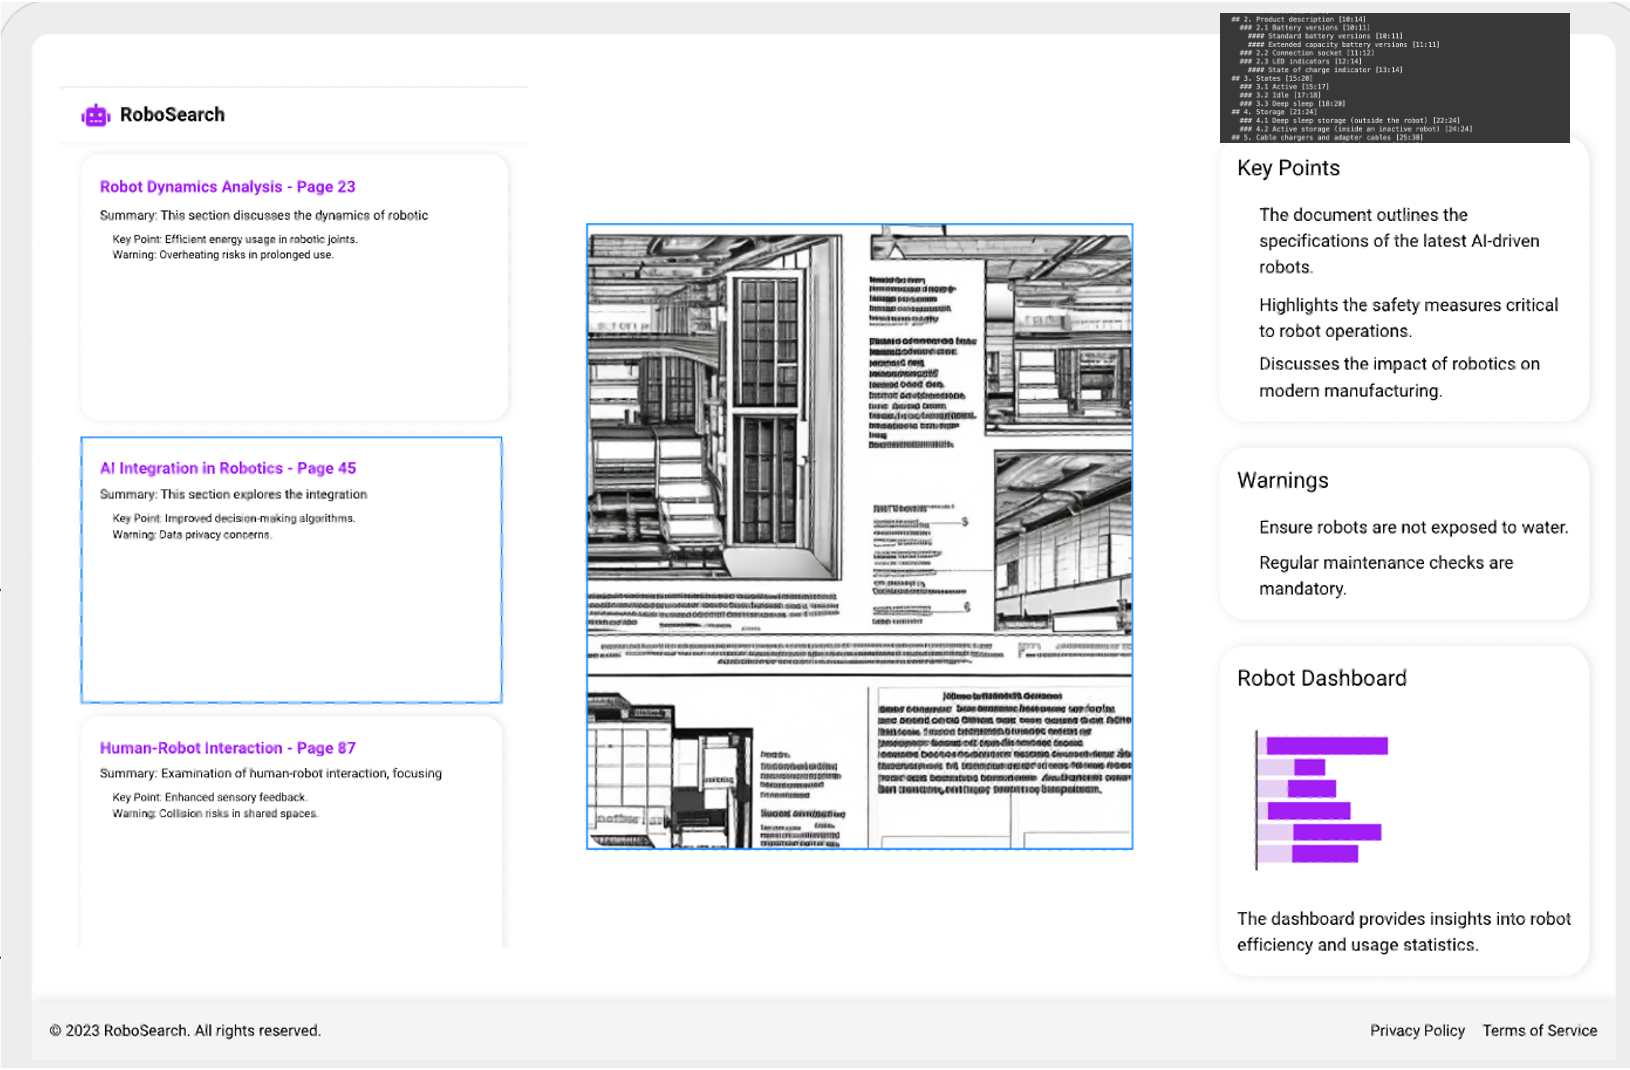

**Nächste Schritte:**

- Evaluationkonzept (highly relevant, relevant, not relevant)

- Klassifizierung (content, extra), Referenzierungen (points to) und Test-Fragen von einzelnen Pages mit LLM-Call

- Entscheiden, was alles in die Summaries kommen soll(vielleicht auch hier Klassifizierung nach Kapitel und Entscheidung für welches Kapitel eine Summary sinnvoll ist), testen und für alle Dokumente generieren lassen

- Data embedden und meta-data hinzufügen

- Set-Up vectordb container:
    1. Filter
    2. Ranking (Nearest Neighbor)
    3. (Reranking mit Page davor/danch/referenzierten (simscore gewichtet))
    4. (Experimental: LLM macht nochmal reranking)
  
- Evaluation mit Test-Fragen (nDCG@k, R@k, P@k)